In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

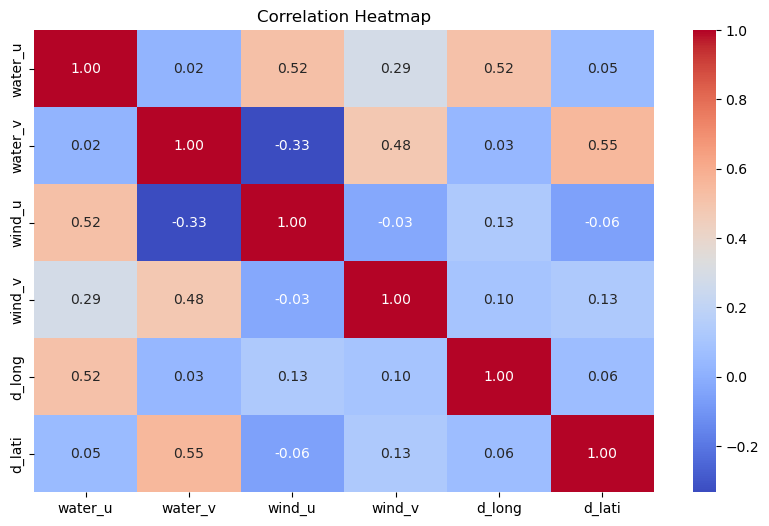

In [2]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]
correlation_matrix = reg.corr()

# heat map
plt.figure(figsize=(10, 6))  # 그림의 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# linear

In [3]:
X = reg[['water_u', 'water_v', 'wind_u', 'wind_v']]
y_long = reg['d_long']
X_long = sm.add_constant(X)
model_long = sm.OLS(y_long, X_long).fit()

In [4]:
X = reg[['water_u', 'water_v', 'wind_u', 'wind_v']]
y_lati = reg['d_lati']
X_lati = sm.add_constant(X)
model_lati = sm.OLS(y_lati, X_lati).fit()

In [5]:
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [6]:
y_long_pred = model_long.predict(X_long)
y_lati_pred = model_lati.predict(X_lati)

rmse_long = calculate_rmse(y_long, y_long_pred)
rmse_lati = calculate_rmse(y_lati, y_lati_pred)

print(f"RMSE for d_long: {rmse_long:.4f}")
print(f"RMSE for d_lati: {rmse_lati:.4f}")

RMSE for d_long: 0.0448
RMSE for d_lati: 0.0350


In [7]:
X = reg[['water_u', 'wind_u', 'wind_v']]
y_long = reg['d_long']
X_long = sm.add_constant(X)
model_long = sm.OLS(y_long, X_long).fit()

In [8]:
X = reg[['water_u', 'water_v', 'wind_v']]
y_lati = reg['d_lati']
X_lati = sm.add_constant(X)
model_lati = sm.OLS(y_lati, X_lati).fit()

In [9]:
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [10]:
y_long_pred = model_long.predict(X_long)
y_lati_pred = model_lati.predict(X_lati)

rmse_long = calculate_rmse(y_long, y_long_pred)
rmse_lati = calculate_rmse(y_lati, y_lati_pred)

print(f"RMSE for d_long: {rmse_long:.4f}")
print(f"RMSE for d_lati: {rmse_lati:.4f}")

RMSE for d_long: 0.0448
RMSE for d_lati: 0.0355


In [11]:
X = reg[['water_u', 'wind_u']]
y_long = reg['d_long']
X_long = sm.add_constant(X)
model_long = sm.OLS(y_long, X_long).fit()

In [12]:
X = reg[['water_u', 'water_v']]
y_lati = reg['d_lati']
X_lati = sm.add_constant(X)
model_lati = sm.OLS(y_lati, X_lati).fit()

In [13]:
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

y_long_pred = model_long.predict(X_long)
y_lati_pred = model_lati.predict(X_lati)

rmse_long = calculate_rmse(y_long, y_long_pred)
rmse_lati = calculate_rmse(y_lati, y_lati_pred)

print(f"RMSE for d_long: {rmse_long:.4f}")
print(f"RMSE for d_lati: {rmse_lati:.4f}")

RMSE for d_long: 0.0450
RMSE for d_lati: 0.0363


In [14]:
X = reg[['water_u']]
y_long = reg['d_long']
X_long = sm.add_constant(X)
model_long = sm.OLS(y_long, X_long).fit()

In [15]:
X = reg[['water_v']]
y_lati = reg['d_lati']
X_lati = sm.add_constant(X)
model_lati = sm.OLS(y_lati, X_lati).fit()

In [16]:
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

y_long_pred = model_long.predict(X_long)
y_lati_pred = model_lati.predict(X_lati)

rmse_long = calculate_rmse(y_long, y_long_pred)
rmse_lati = calculate_rmse(y_lati, y_lati_pred)

print(f"RMSE for d_long: {rmse_long:.4f}")
print(f"RMSE for d_lati: {rmse_lati:.4f}")

RMSE for d_long: 0.0458
RMSE for d_lati: 0.0364


# XGB

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [19]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = xgb.XGBRegressor()
model_d_long.fit(X_train, y_train_long)


predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [20]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = xgb.XGBRegressor()
model_d_lati.fit(X_train, y_train_lati)


predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [21]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04572216018294134
RMSE for d_lati: 0.03608285317482448


In [22]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [23]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = xgb.XGBRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [24]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = xgb.XGBRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [25]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04521591985796989
RMSE for d_lati: 0.03630087798285267


In [26]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [27]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = xgb.XGBRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [28]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = xgb.XGBRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [29]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.046310189091472526
RMSE for d_lati: 0.0371221152377443


In [30]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [31]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = xgb.XGBRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [32]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = xgb.XGBRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [33]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.045363268880590446
RMSE for d_lati: 0.0363376457263395


# LGBM

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [36]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = lgb.LGBMRegressor()
model_d_long.fit(X_train, y_train_long)


predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 12651, number of used features: 4
[LightGBM] [Info] Start training from score 0.015105


In [37]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = lgb.LGBMRegressor()
model_d_lati.fit(X_train, y_train_lati)


predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 12651, number of used features: 4
[LightGBM] [Info] Start training from score 0.006790


In [38]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.043965370044968005
RMSE for d_lati: 0.03455150916900853


In [39]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [40]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = lgb.LGBMRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 12651, number of used features: 3
[LightGBM] [Info] Start training from score 0.015105


In [41]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = lgb.LGBMRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 12651, number of used features: 3
[LightGBM] [Info] Start training from score 0.006790


In [42]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04394599443791096
RMSE for d_lati: 0.034751875322104796


In [43]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [44]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = lgb.LGBMRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 12651, number of used features: 2
[LightGBM] [Info] Start training from score 0.015105


In [45]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = lgb.LGBMRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 12651, number of used features: 2
[LightGBM] [Info] Start training from score 0.006790


In [46]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.044568836764579685
RMSE for d_lati: 0.03564169551429688


In [47]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [48]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = lgb.LGBMRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 12651, number of used features: 1
[LightGBM] [Info] Start training from score 0.015105


In [49]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = lgb.LGBMRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 12651, number of used features: 1
[LightGBM] [Info] Start training from score 0.006790


In [50]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04529574842101579
RMSE for d_lati: 0.03638554543013662


# Random_Forest

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [52]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [53]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = RandomForestRegressor()
model_d_long.fit(X_train, y_train_long)


predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [54]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = RandomForestRegressor()
model_d_lati.fit(X_train, y_train_lati)


predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [55]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04468222598277719
RMSE for d_lati: 0.03543705664045126


In [56]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [57]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = RandomForestRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [58]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = RandomForestRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [59]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04524304017986593
RMSE for d_lati: 0.035858842256078924


In [60]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [61]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = RandomForestRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [62]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = RandomForestRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [63]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.047422470910074614
RMSE for d_lati: 0.03814710637768745


In [64]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [65]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = RandomForestRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [66]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = RandomForestRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [67]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.05448647727255024
RMSE for d_lati: 0.04394249353884966


# SVM

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [69]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [70]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = SVR()
model_d_long.fit(X_train, y_train_long)


predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [71]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = SVR()
model_d_lati.fit(X_train, y_train_lati)


predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [72]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04645485377834086
RMSE for d_lati: 0.03761461954430705


In [73]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [74]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = SVR()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [75]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = SVR()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [76]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04623950742700097
RMSE for d_lati: 0.03747379249403742


In [77]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [78]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = SVR()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [79]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = SVR()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [80]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.045366476645657655
RMSE for d_lati: 0.036729509024930766


In [81]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [82]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = SVR()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [83]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = SVR()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [84]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04616681143332763
RMSE for d_lati: 0.037296745332546885


# Elastic_Net

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [86]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [87]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = ElasticNet()
model_d_long.fit(X_train, y_train_long)


predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [88]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = ElasticNet()
model_d_lati.fit(X_train, y_train_lati)


predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [89]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.052532929250972235
RMSE for d_lati: 0.04398090148647855


In [90]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [91]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = ElasticNet()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [92]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = ElasticNet()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [93]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.052532929250972235
RMSE for d_lati: 0.04398090148647855


In [94]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [95]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = ElasticNet()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [96]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = ElasticNet()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [97]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.052532929250972235
RMSE for d_lati: 0.04398090148647855


In [98]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [99]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = ElasticNet()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [100]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = ElasticNet()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [101]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.052532929250972235
RMSE for d_lati: 0.04398090148647855


# KNN

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [103]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [104]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = KNeighborsRegressor()
model_d_long.fit(X_train, y_train_long)


predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [105]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_u', 'water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = KNeighborsRegressor()
model_d_lati.fit(X_train, y_train_lati)


predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [106]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.05277938009569707
RMSE for d_lati: 0.04319212391804443


In [107]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [108]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u', 'wind_v']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = KNeighborsRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [109]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_u', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = KNeighborsRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [110]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.05230119631868211
RMSE for d_lati: 0.04275448269560187


In [111]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [112]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u', 'wind_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = KNeighborsRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [113]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v', 'wind_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = KNeighborsRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [114]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04847082023743116
RMSE for d_lati: 0.03886453767556394


In [115]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")
reg = data.copy()
reg = reg.iloc[:,4:10]

In [116]:
X_train, X_test, y_train_long, y_test_long = train_test_split(
    reg[['water_u']], reg['d_long'], test_size=0.2, random_state=42)
model_d_long = KNeighborsRegressor()
model_d_long.fit(X_train, y_train_long)

predictions_d_long = model_d_long.predict(X_test)
rmse_d_long = math.sqrt(mean_squared_error(y_test_long, predictions_d_long))

In [117]:
X_train, X_test, y_train_lati, y_test_lati = train_test_split(
    reg[['water_v']], reg['d_lati'], test_size=0.2, random_state=42)
model_d_lati = KNeighborsRegressor()
model_d_lati.fit(X_train, y_train_lati)

predictions_d_lati = model_d_lati.predict(X_test)
rmse_d_lati = math.sqrt(mean_squared_error(y_test_lati, predictions_d_lati))

In [118]:
print(f'RMSE for d_long: {rmse_d_long}')
print(f'RMSE for d_lati: {rmse_d_lati}')

RMSE for d_long: 0.04920087134893679
RMSE for d_lati: 0.0394800915246671
